---
Concept Relevance Propagation (CRP) introduction 
---


**Description:**  
A basic intro to the propagtion method
### Additional Comments
### Author: Viswambhar Yasa

### Date: 09-01-2024

**Contact Information:**  
Email: [yasa.viswambhar@gmail.com](mailto:yasa.viswambhar@gmail.com)

In [1]:
import os
import io
import sys
import torch
from PIL import Image
from pathlib import Path
import torch.nn.functional as F
import matplotlib.pyplot as plt
from crp.image import imgify,vis_opaque_img

In [2]:
notebook_directory = Path().resolve().parent
sys.path.insert(0,str(notebook_directory.parent))
from experiment.helper_functions import load_dict
from sentinelmodels.pretrained_models import buildmodel
from interpet.CRP import CRPModel

In [3]:

config={    
                "root_dir":r'D:/master-thesis/Dataset/anthroprotect',
                "datasplitfilename": r"infos.csv",
                "n_classes":2,
                "datasaved":True,
                "device":"cpu",
                "models":["alexnet","vgg16","resnet18"],
                "modelweightpaths":[r"D:/Thesis/ExplainingWilderness/experiments/figures/trained_models/pretrained/alexnet_best_model.pth",
                                    r"D:/Thesis/ExplainingWilderness/experiments/figures/trained_models/pretrained/vgg16_best_model.pth",
                                    r"D:/Thesis/ExplainingWilderness/experiments/figures/trained_models/pretrained/resnet18_best_model.pth",
                                    ],
                "cmap":"hot",
                "symmetric":False,
                "level":1
                }

modelindex=-1
datafilepath=r"D:/finaldraft/ExplainingWilderness/experiment/Notebooks/data/wilderness_data.pkl"

loaded_data = dictionary = load_dict(datafilepath)
# Accessing the loaded images and labels
images = loaded_data["images"][-1,:,:,:].unsqueeze(dim=0).to(config["device"])
#images = loaded_data["images"].to(config["device"])

labels = loaded_data["labels"]

In [4]:
modelindex=1
model=buildmodel(model_type=config["models"][modelindex],multiclass_channels=config["n_classes"],modelweightpath=config["modelweightpaths"][modelindex]).to(config["device"])

In [5]:
crp_model=CRPModel(model)

Index of the layer required for concept registration /n
0 Conv2DCRP(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1 Conv2DCRP(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2 MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
3 Conv2DCRP(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
4 Conv2DCRP(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
5 MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
6 Conv2DCRP(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
7 Conv2DCRP(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
8 Conv2DCRP(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
9 MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
10 Conv2DCRP(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
11 Conv2DCRP(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
12 Conv2DCRP(512, 512, kernel_size=(3, 3), stride=(

In [6]:
del model

In [7]:
crp_model

CRPModel(
  (model): VGG16(
    (features): Sequential(
      (0): Conv2DCRP(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2DCRP(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2DCRP(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2DCRP(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2DCRP(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2DCRP(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2DCRP(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): R

In [8]:
prediction=crp_model(images)

In [9]:
probabilities = torch.nn.functional.softmax(prediction, dim=-1)
print(probabilities.shape)

torch.Size([1, 2])


In [10]:
for index,layer in enumerate(crp_model.layer_inputs.items()):
    print(index,layer[0],layer[1].shape)

0 Conv2DCRP(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([1, 3, 256, 256])
1 Conv2DCRP(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([1, 64, 256, 256])
2 MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) torch.Size([1, 64, 256, 256])
3 Conv2DCRP(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([1, 64, 128, 128])
4 Conv2DCRP(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([1, 128, 128, 128])
5 MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) torch.Size([1, 128, 128, 128])
6 Conv2DCRP(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([1, 128, 64, 64])
7 Conv2DCRP(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([1, 256, 64, 64])
8 Conv2DCRP(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([1, 256, 64, 64])
9 MaxPool2dCRP(kernel_size=2, stride=2, padding=0, dilation=1, ceil

In [11]:
parameter={"epsilon": 1e-2,"alpha":1,"beta":0,"gamma":0}
concept_ids={}
estimate_relevance={22:1,15:1,16:3}
explain_output=crp_model.interpet(images,"max","zplus",concept_ids,parameter,estimate_relevance,input_zbetaplus=False)

In [12]:
keys = list(estimate_relevance.keys())
keys_str = ' '.join(map(str, keys))

In [13]:
explain_output.keys()

dict_keys(['_1_bi0_363_89', '_1_bi0_208_434', '_1_bi0_178_110'])

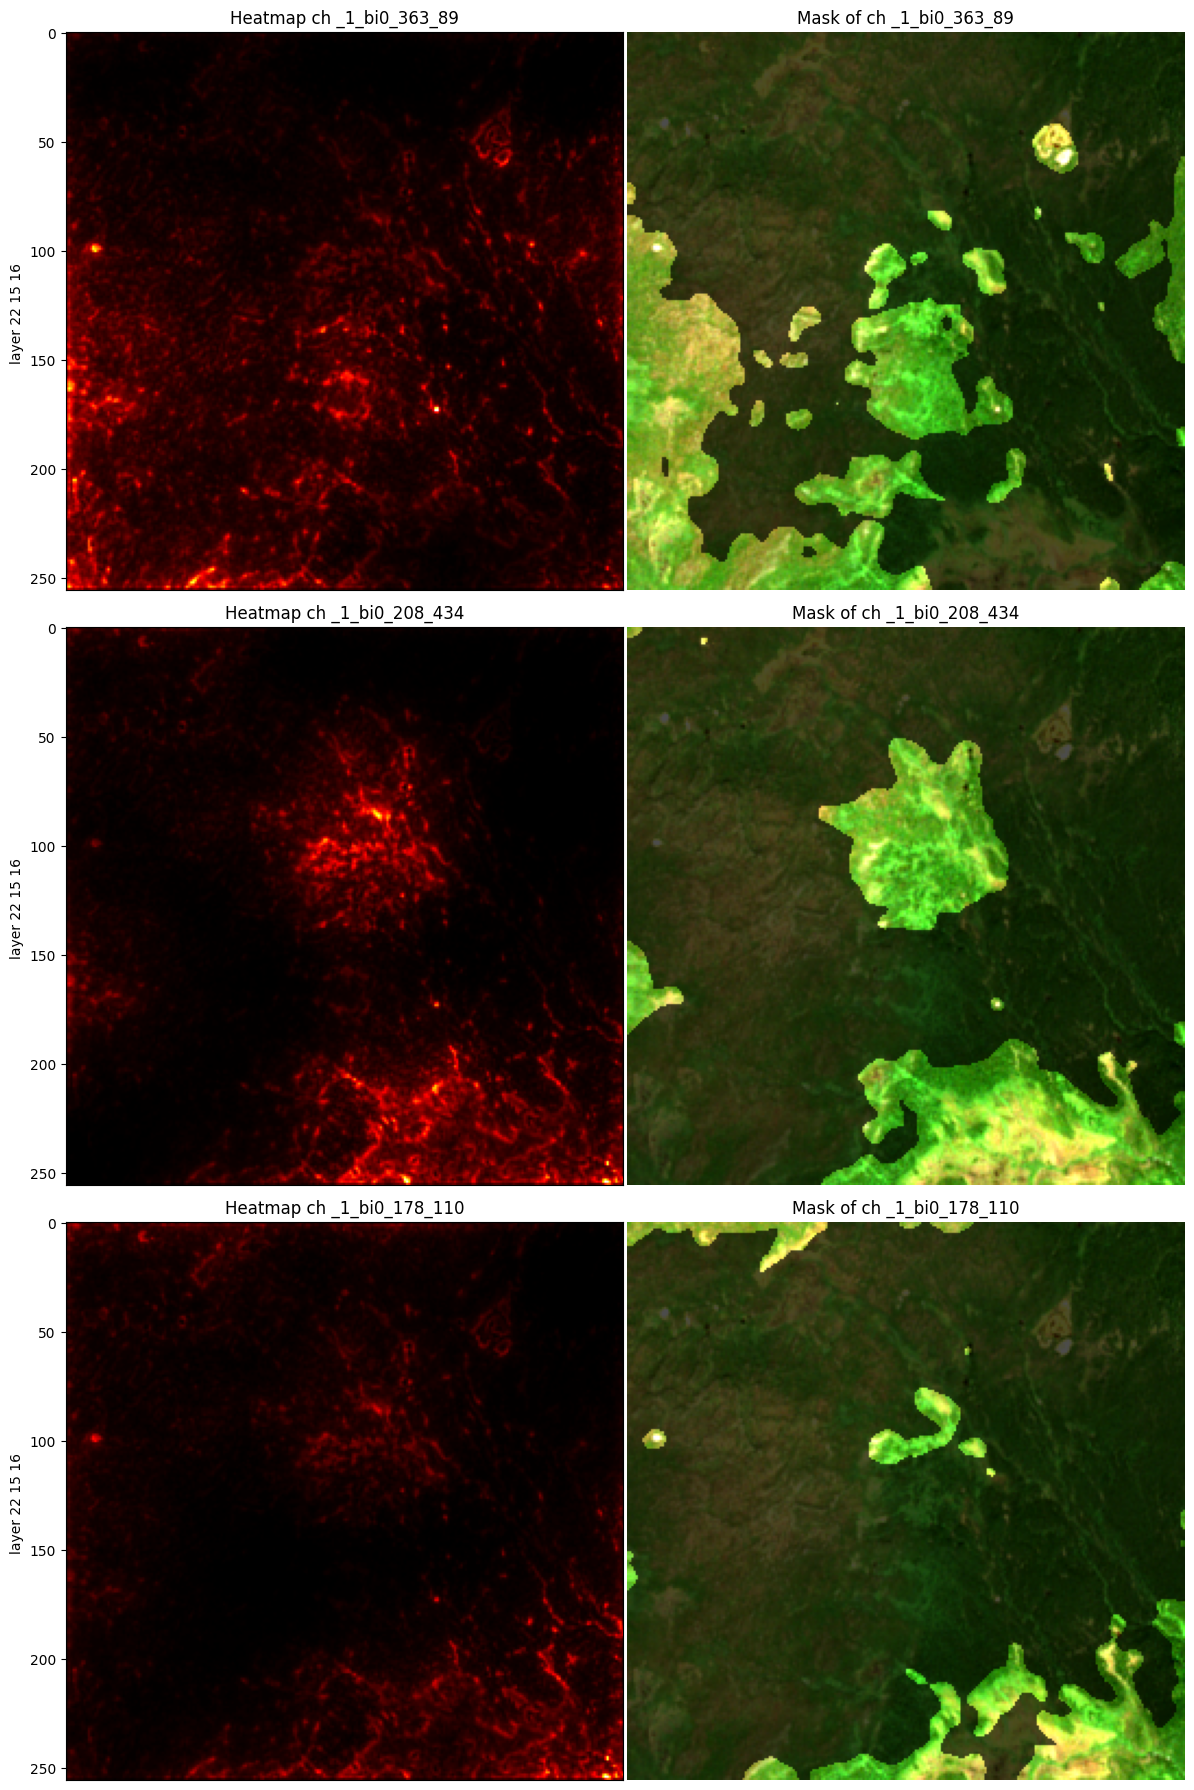

In [14]:
num_keys = len(explain_output)
num_cols = 2
num_rows = num_keys

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Iterate over each item in the dictionary
for i, (key, value) in enumerate(explain_output.items()):
  
    # Heatmap Visualization
    axes[i, 0].imshow(imgify(value.sum(dim=1).detach().cpu().numpy(), cmap="hot", symmetric=False, level=1))
    axes[i, 0].set_title(f"Heatmap ch {key}")
    axes[i, 0].set_ylabel(f"layer {keys_str} ")
    axes[i, 0].axis("on")
    axes[i, 0].get_yaxis().set_visible(True)
    axes[i, 0].get_xaxis().set_visible(False)

    # Mask Visualization
    axes[i, 1].imshow(vis_opaque_img(images, value.sum(dim=1))[0])
    axes[i, 1].set_title(f"Mask of ch {key}")
    axes[i, 1].set_ylabel(f"layer {keys_str} ")
    axes[i, 1].axis("off")
   
# Adjust layout and show the plot
plt.tight_layout()
saved_path="D:/finaldraft/ExplainingWilderness/experiment/Notebooks/temp/heatmaps"
plt.savefig(os.path.join(saved_path,"./"+config["models"][modelindex]+"_crp.png"),dpi=600)
plt.show()
#bi0:image index in batch 0